In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('hepatitis.data',header=None) 

In [5]:
# Convert ? to Nan values 
data.replace('?', np.NaN,inplace=True) 
# drop the rows with more than 3 null valeus
data=data[data.isnull().sum(axis=1) < 3] 
# filling missing values with median 
data.fillna(data.median(), inplace=True) 
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1] 

Select the k best features 

In [10]:
best = 0
best_acc = 0 
a = np.zeros(20)
b = np.zeros(20)
d = np.zeros(20)
c = np.ones(20)

for i in range (1, 20):
    X_new = SelectKBest(chi2, k=i).fit_transform(X, y)
    sc = StandardScaler()
    X_new = sc.fit_transform(X_new)
    clf = GaussianNB()
    y_pred = cross_val_predict(clf, X_new, y, cv=10)
    accuracy = accuracy_score(y, y_pred)
    a[i] = i
    b[i] = accuracy
    d[i] = i/20
    if accuracy > best_acc:
        best_acc = accuracy
        best = i

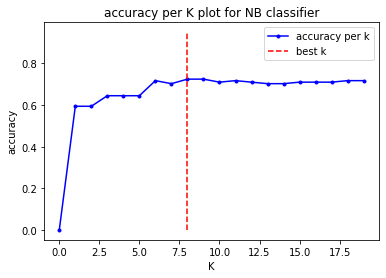

best k:  8


In [12]:
c = best*c 

plt.xlabel('K')
plt.ylabel('accuracy')
plt.plot(a,b, marker='.',linestyle='-', color='b',label='accuracy per k')
plt.plot(c,d, marker='',linestyle='--', color='r',label='best k')
plt.legend(loc='upper right')
plt.title("accuracy per K plot for NB classifier")
plt.show()
print("best k: ", best)

In [13]:
X_new = SelectKBest(chi2, k=best).fit_transform(X, y) 
sc= MinMaxScaler() 
X_new = sc.fit_transform(X_new)

Checking some voting models which four of them are selected.

In [30]:
clf1 = LogisticRegression(solver='liblinear', penalty="l1", C=10, max_iter=100) 
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=5)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('KNN', clf3)], voting='hard')
y_pred = cross_val_predict(clf, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for 1st voting model: ', accuracy)

accuracy for 1st voting model:  0.7391304347826086


In [31]:
LogReg_clf = LogisticRegression(solver='liblinear', penalty="l1", C=1, max_iter=100) 
GNB = GaussianNB() 
SVC_clf = svm.SVC()
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('GNB', GNB), ('LogReg', LogReg_clf)], voting='hard')
y_pred = cross_val_predict(voting_clf, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for 2nd voting model: ', accuracy)

accuracy for 2nd voting model:  0.7101449275362319


In [32]:
classifiers = [
    ('KNN',KNeighborsClassifier(n_neighbors=5)),
    ('GNB', GaussianNB()),
    ('svc', svm.SVC(kernel='rbf', gamma=1)),
]
clftwo = VotingClassifier(classifiers, voting='hard')
y_pred = cross_val_predict(clftwo, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for 3rd voting model: ', accuracy)

accuracy for 3rd voting model:  0.7536231884057971


In [33]:
classifiers = [
    ('KNN1',KNeighborsClassifier(n_neighbors=7)),
    ('KNN2', KNeighborsClassifier(n_neighbors=5)),
    ('KNN3', KNeighborsClassifier(n_neighbors=17)),
]
clftwo = VotingClassifier(classifiers , voting='hard')
y_pred = cross_val_predict(clftwo, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for 4th voting model: ', accuracy)

accuracy for 4th voting model:  0.717391304347826


Base Models of the best voting models

In [34]:
clf1 = LogisticRegression(solver='liblinear', penalty="l2", C=1, max_iter=100)
y_pred = cross_val_predict(clf1, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for Logistic Regression: ', accuracy)

accuracy for Logistic Regression:  0.7028985507246377


In [35]:
clf2 = GaussianNB()
y_pred = cross_val_predict(clf2, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for GB: ', accuracy)

accuracy for GB:  0.7246376811594203


In [36]:
SVC_clf = svm.SVC(kernel='rbf', gamma=1)
y_pred = cross_val_predict(SVC_clf, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for SVM: ', accuracy)

accuracy for SVM:  0.717391304347826


In [37]:
DT = DecisionTreeClassifier()
y_pred = cross_val_predict(DT, X_new, y, cv=10)
accuracy = accuracy_score(y, y_pred)
print ('accuracy for DT: ', accuracy)

accuracy for DT:  0.5434782608695652
